In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
files = glob.glob('time_series/*')

In [3]:
arg_df = pd.read_csv(files[0])

In [4]:
arg_df = arg_df.set_index('month')

In [5]:
arg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1980-01 to 2019-04
Data columns (total 69 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           470 non-null    int64  
 1   country                              470 non-null    object 
 2   fed_pos                              470 non-null    float64
 3   fed_neg                              470 non-null    float64
 4   w2v_pos                              470 non-null    float64
 5   w2v_neg                              470 non-null    float64
 6   w2v_refined_2_pos                    470 non-null    float64
 7   w2v_refined_2_neg                    470 non-null    float64
 8   vader_pos                            470 non-null    float64
 9   vader_neg                            470 non-null    float64
 10  tb_polarity                          470 non-null    float64
 11  tb_is_positive             

In [6]:
drop_cols = ['Unnamed: 0', 'country', 'vader_pos', 'vader_neg', 'tb_polarity', 
             'tb_is_positive', 'tb_subjectivity', 'afinn_score', 'affin_is_positive',
            'num_doc', 'vader_is_pos'] 

In [7]:
country_ref = arg_df.drop(columns=drop_cols)
country_ref.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1980-01 to 2019-04
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fed_pos                              470 non-null    float64
 1   fed_neg                              470 non-null    float64
 2   w2v_pos                              470 non-null    float64
 3   w2v_neg                              470 non-null    float64
 4   w2v_refined_2_pos                    470 non-null    float64
 5   w2v_refined_2_neg                    470 non-null    float64
 6   vader_pos_x_fed_pos                  470 non-null    float64
 7   vader_neg_x_fed_neg                  470 non-null    float64
 8   vader_is_pos_x_fed_pos               470 non-null    float64
 9   vader_is_neg_x_fed_neg               470 non-null    float64
 10  textblob_polar_x_fed_pos             470 non-null    float64
 11  textblob_polar_x_fed_neg   

In [8]:
from sklearn.preprocessing import scale
def scale_df(df):
    df = df.copy()
    for col in df.columns:
        df[col] = scale(df[col])
    return df

In [9]:
pos_country = country_ref[country_ref.columns[::2]]
pos_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1980-01 to 2019-04
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fed_pos                              470 non-null    float64
 1   w2v_pos                              470 non-null    float64
 2   w2v_refined_2_pos                    470 non-null    float64
 3   vader_pos_x_fed_pos                  470 non-null    float64
 4   vader_is_pos_x_fed_pos               470 non-null    float64
 5   textblob_polar_x_fed_pos             470 non-null    float64
 6   textblob_is_pos_x_fed_pos            470 non-null    float64
 7   afinn_score_x_fed_pos                470 non-null    float64
 8   afinn_is_pos_x_fed_pos               470 non-null    float64
 9   vader_pos_x_w2v_pos                  470 non-null    float64
 10  vader_is_pos_x_w2v_pos               470 non-null    float64
 11  textblob_polar_x_w2v_pos   

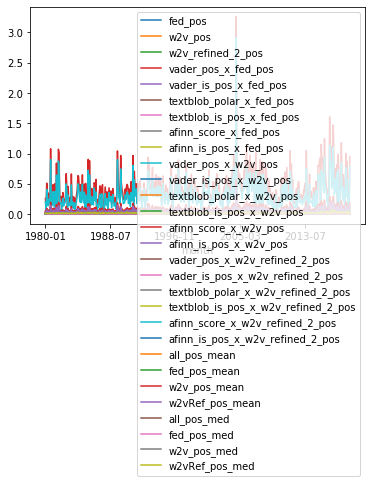

In [10]:
pos_country.plot()

Positive Originals


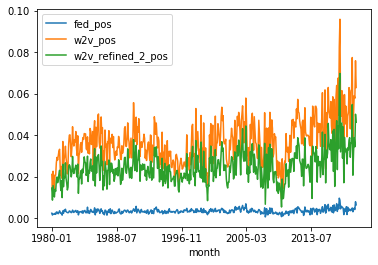

Positive Originals - Normalized


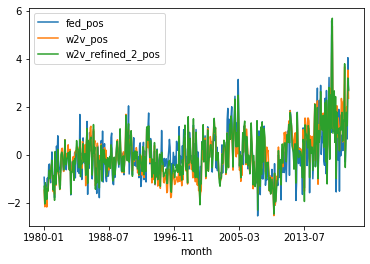

In [11]:
print('Positive Originals')
pos_orig = pos_country[pos_country.columns[:3]]
pos_orig.plot()
plt.show()
print('Positive Originals - Normalized')
pos_orig = pos_country[pos_country.columns[:3]]
scaled = scale_df(pos_orig)
scaled.plot()
plt.show()

Positive Vader


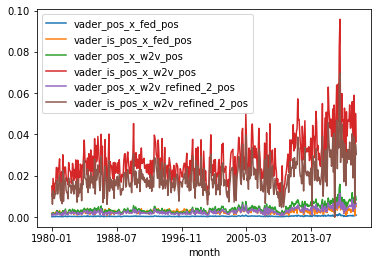

Positive Vader - Normalized


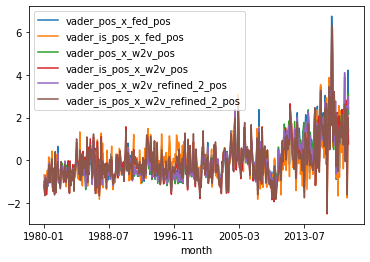

In [12]:
print('Positive Vader')
pos_vader_cols = pos_country.columns[[3,4,9,10,15,16]]
pos_vader = pos_country[pos_vader_cols]
pos_vader.plot()
plt.show()
print('Positive Vader - Normalized')
pos_vader_cols = pos_country.columns[[3,4,9,10,15,16]]
pos_vader = pos_country[pos_vader_cols]
scaled = scale_df(pos_vader)
scaled.plot()
plt.show()

Positive Vader


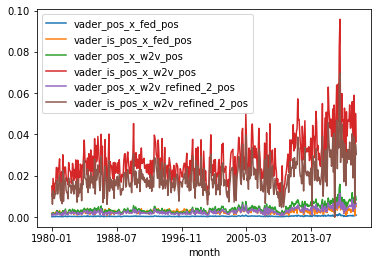

Positive Vader - Normalized


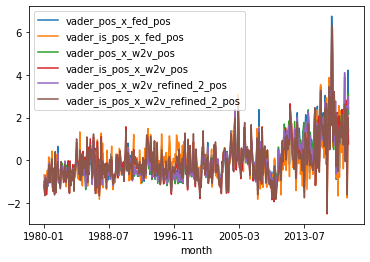

In [13]:
print('Positive Vader')
pos_vader_cols = pos_country.columns[[3,4,9,10,15,16]]
pos_vader = pos_country[pos_vader_cols]
pos_vader.plot()
plt.show()
print('Positive Vader - Normalized')
pos_vader_cols = pos_country.columns[[3,4,9,10,15,16]]
pos_vader = pos_country[pos_vader_cols]
scaled = scale_df(pos_vader)
scaled.plot()
plt.show()

In [14]:
neg_country = country_ref[country_ref.columns[1::2]]
neg_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 1980-01 to 2019-04
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   fed_neg                              470 non-null    float64
 1   w2v_neg                              470 non-null    float64
 2   w2v_refined_2_neg                    470 non-null    float64
 3   vader_neg_x_fed_neg                  470 non-null    float64
 4   vader_is_neg_x_fed_neg               470 non-null    float64
 5   textblob_polar_x_fed_neg             470 non-null    float64
 6   textblob_is_neg_x_fed_neg            470 non-null    float64
 7   afinn_score_x_fed_neg                470 non-null    float64
 8   afinn_is_neg_x_fed_neg               470 non-null    float64
 9   vader_neg_x_w2v_neg                  470 non-null    float64
 10  vader_is_neg_x_w2v_neg               470 non-null    float64
 11  textblob_polar_x_w2v_neg   

Negative Originals


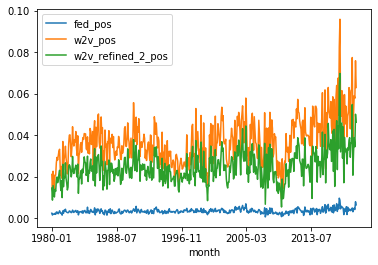

In [15]:
print('Negative Originals')
neg_orig = neg_country[neg_country.columns[:3]]
pos_orig.plot()

Negative Originals - Normalized


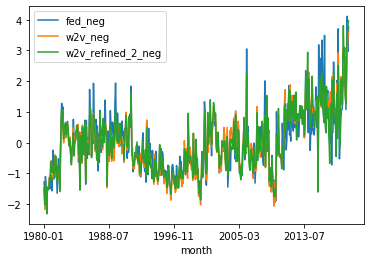

In [16]:
print('Negative Originals - Normalized')
neg_orig = neg_country[neg_country.columns[:3]]
scaled = scale_df(neg_orig)
scaled.plot()